# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
#from scipy import stats
import sklearn as sk
#import itertools

# Data Vis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from scipy.stats import skew

# Data Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Loading and inspecting the data

In [2]:
# Change the settings so that you can see all columns of the dataframe when calling df.head()
pd.set_option('display.max_columns',999)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Attributes like PoolQC and MiscFeatures have a lot of missing data in both training and test set and it might be neccessary to drop them. 
On the other hand, a lot of the NULL values might not be missing data but it was simply not applicable. For example, if there is no pool then there cannot be any pool quality. 

The data types are also wrong for some columns like MSSubclass should be object instead its int

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

### Converting to objects

In [6]:
# Convert training data
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['MoSold'] = train['MoSold'].astype('object')

# Convert test data
test['MSSubClass'] = test['MSSubClass'].astype('object')
test['MoSold'] = test['MoSold'].astype('object')

### Converting to float

In [7]:
# Convert training data
numeric_train = train.select_dtypes(include=[np.number]).columns.tolist()
train[numeric_train] = train[numeric_train].astype('float64')

# Convert test data
numeric_test = test.select_dtypes(include=[np.number]).columns.tolist()
test[numeric_test] = test[numeric_test].astype('float64')

### Impute Null Values

In [8]:
train_object_impute = train[['Electrical', 'Utilities', 'MSZoning', 'KitchenQual', 'Exterior1st']].columns

In [9]:
#Imputing train data
for variable in train_object_impute:
    train[variable] = train[variable].fillna(train[variable].mode()[0])


In [10]:
test_object_impute = test[['Electrical', 'Utilities', 'MSZoning', 'KitchenQual', 'Exterior1st']].columns

In [11]:
#Imputing test data
for variable in test_object_impute:
    test[variable] = test[variable].fillna(test[variable].mode()[0])

In [12]:
train_object_missing = train[['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1' ,'BsmtFinType2' ,'FireplaceQu'   
,'GarageType' ,'GarageYrBlt','GarageFinish' ,'GarageQual','GarageCond','PoolQC' ,'Fence'  ,'MiscFeature']].columns

In [13]:
for variable in train_object_missing:
    train[variable] = train[variable].fillna('None')
    
train['Functional'] = train['Functional'].fillna('Typ') 
train['SaleType'] = train['SaleType'].fillna('Oth')
train['Exterior1st'] = train['Exterior1st'].fillna('Other')
train['Exterior2nd'] = train['Exterior2nd'].fillna('Other')

In [14]:
#Same for test
test_object_missing = test[['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1' ,'BsmtFinType2' ,'FireplaceQu'   
,'GarageType' ,'GarageYrBlt','GarageFinish' ,'GarageQual','GarageCond','PoolQC' ,'Fence'  ,'MiscFeature']].columns

In [15]:
for variable in test_object_missing:
    test[variable] = test[variable].fillna('None')
    
test['Functional'] = test['Functional'].fillna('Typ') 
test['SaleType'] = test['SaleType'].fillna('Oth')
test['Exterior1st'] = test['Exterior1st'].fillna('Other')
test['Exterior2nd'] = test['Exterior2nd'].fillna('Other')

In [16]:
# Numerical Data: Overwrite Nulls to 0

Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.


In [17]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [18]:
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

In [21]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [22]:
#Same for test
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [23]:
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [24]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [25]:
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [26]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

### Check if any missing value remaining

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null float64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st 

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null float64
MSSubClass       1459 non-null object
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null float64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null float64
OverallCond      1459 non-null float64
YearBuilt        1459 non-null float64
YearRemodAdd     1459 non-null float64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st 

## Prepare the Data

In [29]:
# Get all features from the training set apart from Id and SalePrice
predictor_cols = train.columns.drop(['Id','SalePrice'])
predictor_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [30]:
#Delete Outliers
train = train[train['LotFrontage'] < 300]
train = train[train['LotArea'] < 100000]
train = train[train['BsmtFinSF1'] < 5000]
train = train[train['TotalBsmtSF'] < 6000]
train = train[train['1stFlrSF'] < 4000]
train = train[train['GrLivArea'] < 4500]

In [31]:
#Overwrite Bad Data
test[test['GarageYrBlt'] == 2207]['GarageYrBlt'] = 2007

### Categorical to ordinal variables

In [32]:
# Get a dictionary that can be used to map the ordinal values to the quality values
dict_num = {'None': 1, 'NA': 1,'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6,
            'Unf': 2,'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7,
            'Unf': 2, 'RFn': 3, 'Fin': 4,
            'Sal': 2,'Sev': 3, 'Maj2': 4, 'Maj1': 5, 'Mod': 6, 'Min2': 7, 'Min1': 8, 'Typ': 9,
            'MnWw': 2, 'GdWo': 3, 'MnPrv': 4, 'GdPrv': 5,
            'Sev': 1, 'Mod': 2, 'Gtl': 3,
            'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

In [33]:
quality_variable = ['ExterQual', 
                  'ExterCond',
                  'BsmtQual',
                  'BsmtCond',
                  'BsmtExposure',
                  'BsmtFinType1',
                  'BsmtFinType2',
                  'HeatingQC',
                  'KitchenQual',
                  'Functional',
                  'FireplaceQu',
                  'GarageFinish',
                  'GarageQual',
                  'GarageCond',
                  'PoolQC',
                  'Fence',
                  'LandSlope']

In [34]:
for variable in quality_variable:
    train[variable] = train[variable].map(dict_num).astype('int')
    test[variable] = test[variable].map(dict_num).astype('int')

### Create new features

In [35]:
train['TotalSF'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF'])
test['TotalSF'] = (test['BsmtFinSF1'] + test['BsmtFinSF2'] + test['1stFlrSF'] + test['2ndFlrSF'])

train['Total_Bathrooms'] = (train['FullBath'] + (0.5*train['HalfBath']) + train['BsmtFullBath'] + (0.5*train['BsmtHalfBath']))
test['Total_Bathrooms'] = (test['FullBath'] + (0.5*test['HalfBath']) + test['BsmtFullBath'] + (0.5*test['BsmtHalfBath']))

train['Total_PorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF'])
test['Total_PorchSF'] = (test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF'])

train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['HasPool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['Has2ndFloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['HasGarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

train['HasBsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['HasBsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

train['HasFireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['HasFireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Drop useless variables

In [36]:
delete_features = ['Street', 
                    'Alley',
                   'LandSlope',
                   'Utilities',
                   'Condition2',
                   'RoofMatl',
                   'Heating',
                   'LowQualFinSF',
                   'KitchenAbvGr',
                   'Functional',
                   '3SsnPorch',
                   'ScreenPorch',
                   'PoolArea',
                   'PoolQC',
                   'MiscFeature',
                   'MiscVal']


In [37]:
predictor_cols = predictor_cols.drop('GarageYrBlt')
predictor_cols = predictor_cols.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'PoolArea', '2ndFlrSF', 'GarageArea',
'TotalBsmtSF', 'Fireplaces'])

In [38]:
# Get the predicted variable
y = train['SalePrice']
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

### Scale and Standardize numeric data

In [39]:
y = np.log1p(y)

I only take the log if the skew is above a certain threshold - here it is 0.5. This is based on the interpretations from here: https://brownmath.com/stat/shape.htm & https://www.kaggle.com/akosciansky/house-price-predictions-complete-walkthrough

In [40]:
# Log of numeric variables and show which features are the most skewed
# I am not taking into account the 'int' variables as they are ordinal categorical variables

numeric_features = train.dtypes[train.dtypes == 'float64'].index

skewed_features = train[numeric_features].apply(lambda x: skew(x))
np.abs(skewed_features).sort_values(ascending=False)

MiscVal            24.460871
PoolArea           15.904867
3SsnPorch          10.268380
LowQualFinSF        8.979687
KitchenAbvGr        4.471464
BsmtFinSF2          4.277521
BsmtHalfBath        4.119739
ScreenPorch         4.106460
LotArea             3.957270
EnclosedPorch       3.077203
MasVnrArea          2.704964
OpenPorchSF         2.336242
SalePrice           1.896364
WoodDeckSF          1.520831
Total_PorchSF       1.100902
TotalSF             1.026778
GrLivArea           1.019026
BsmtUnfSF           0.917698
1stFlrSF            0.893689
2ndFlrSF            0.809632
BsmtFinSF1          0.770541
OverallCond         0.693158
HalfBath            0.673880
TotRmsAbvGrd        0.663477
LotFrontage         0.636127
Fireplaces          0.633705
YearBuilt           0.613305
BsmtFullBath        0.576569
TotalBsmtSF         0.512156
YearRemodAdd        0.501601
GarageCars          0.338488
Total_Bathrooms     0.245499
BedroomAbvGr        0.214194
OverallQual         0.202686
GarageArea    

In [41]:
# Continue taking the log when skewness > 0.5

skewed_features = skewed_features[skewed_features > 0.5]
skewed_features = skewed_features.index

train[skewed_features] = np.log1p(train[skewed_features])
test[skewed_features.drop('SalePrice')] = np.log1p(test[skewed_features.drop('SalePrice')])

## One-Hot Encoding of Categorical Variables

In [42]:
pre_X_train = train[predictor_cols]
pre_X_test = test[predictor_cols]

# 2)
pre_X_train_one_hot = pd.get_dummies(pre_X_train)
pre_X_test_one_hot = pd.get_dummies(pre_X_test)

# 3)
X_train, X_test = pre_X_train_one_hot.align(pre_X_test_one_hot, join='inner', axis='columns')

In [43]:
overfit = []
for i in pre_X_train_one_hot.columns:
    counts = pre_X_train_one_hot[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(pre_X_train_one_hot) * 100 >99:
        overfit.append(i)

In [44]:
overfit = list(overfit)
overfit

['PoolQC',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_180',
 'MSZoning_C (all)',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR3',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Ext

## Predicted variable

In [45]:
y_train = y

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)

X_train: (1453, 223)
X_test: (1459, 223)
y_train: (1453,)


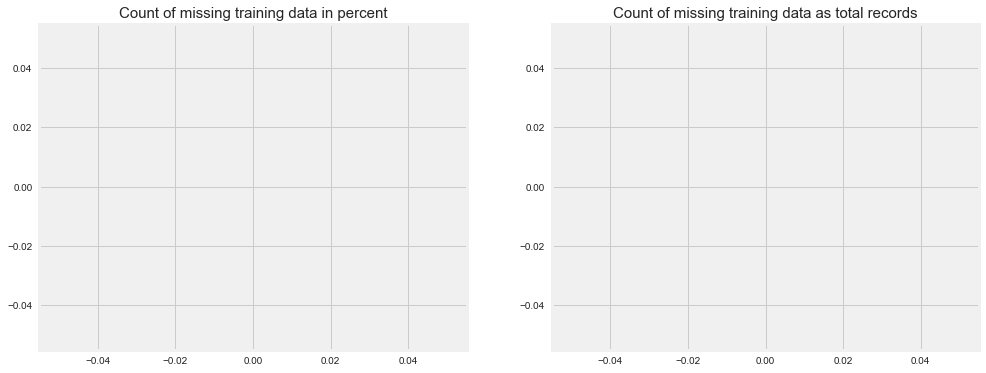

In [46]:
 #Capture the necessary data
variables = X_test.columns

count = []

for variable in variables:
    length = X_test[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(X_test), 2)
count = pd.Series(count)

missing = pd.DataFrame()
missing['variables'] = variables
missing['count'] = len(X_test) - count
missing['count_pct'] = 100 - count_pct
missing = missing[missing['count_pct'] > 0]
missing.sort_values(by=['count_pct'], inplace=True)
missing_train = np.array(missing['variables'])

#Plot number of available data per variable
plt.subplots(figsize=(15,6))

# Plots missing data in percentage
plt.subplot(1,2,1)
plt.barh(missing['variables'], missing['count_pct'])
plt.title('Count of missing training data in percent', fontsize=15)

# Plots total row number of missing data
plt.subplot(1,2,2)
plt.barh(missing['variables'], missing['count'])
plt.title('Count of missing training data as total records', fontsize=15)

plt.show()

# ML Models

In [47]:
# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## 1.RandomForestRegression

In [48]:
# Regression
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf_reg = RandomForestRegressor(n_estimators=100,
                              random_state=1)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_train)
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=5)

In [50]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

Average 5-Fold CV Score: 0.8742796970752602
[0.87365553 0.89010816 0.86414613 0.88010803 0.86338063]


In [51]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.051962466934054444


In [52]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
rf_grid = RandomForestRegressor(n_estimators=1000,
                                max_depth=26, #16
                                max_features=40, #30
                                min_samples_leaf=10, # using 5 doesn't seem to improve things
                                random_state=1)
rf_grid.fit(X_train, y_train)
y_pred_grid = rf_grid.predict(X_train)
cv_scores_rf_grid = cross_val_score(rf_grid, X_train, y_train, cv=5)

In [54]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf_grid)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf_grid)

Average 5-Fold CV Score: 0.8516661498000355
[0.8659968  0.8633979  0.8429465  0.84123235 0.8447572 ]


In [55]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred_grid))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.12928722592552275


## 2.Support Vector Regressor

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred = regressor.predict(X_train)
cv_scores_rf = cross_val_score(regressor, X_train, y_train, cv=5)

In [60]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

Average 5-Fold CV Score: 0.8201030522815256
[0.82162418 0.81775065 0.83022269 0.8184156  0.81250213]


In [61]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.10546494299636344
